<h1 align = center> Crops Prediction Model </h1>

### Building a predictive model which suggest the best crops to be grown or  produced under the available climatic and soil conditions.

### Importing usefull Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as interact
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## About the data

**Features**

N - Nitrogen value in soil

P - Phosphorus value in soil

K - Potassium value in soil

Temperature - Local Temperature of that area

Humidity - Humidity in nature

Rainfall - Average rainfall in that region

Ph - Acidic value of the soil

**Target Feature**

Crops - Crop that has to be Grown.

### Importing dataset

In [2]:
df = pd.read_csv("data/agricultural_data.csv")
df.head()

,N,P,K,Temperature,Humidity,Ph,Rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   Ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crops        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 129.0+ KB


In [5]:
df.describe()

,N,P,K,Temperature,Humidity,Ph,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Data Analyzing

In [6]:
# for null values
df.isnull().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
Ph             0
Rainfall       0
Crops          0
dtype: int64

#### There is no null value in the dataset.

In [7]:
print("No. of unique values in each feature \n")
for feature in df.columns:
    print(f"{feature} : {df[feature].nunique()} values")

No. of unique values in each feature 

N : 137 values
P : 117 values
K : 73 values
Temperature : 2200 values
Humidity : 2200 values
Ph : 2200 values
Rainfall : 2200 values
Crops : 22 values


### Discrete features

In [8]:
# getting the discrete features
discrete_features = [feature for feature in df.columns if df[feature].nunique() < 200]
print("Discrete feature =", discrete_features)

Discrete feature = ['N', 'P', 'K', 'Crops']


In [9]:
df[discrete_features].head()

,N,P,K,Crops
0,90,42,43,rice
1,85,58,41,rice
2,60,55,44,rice
3,74,35,40,rice
4,78,42,42,rice


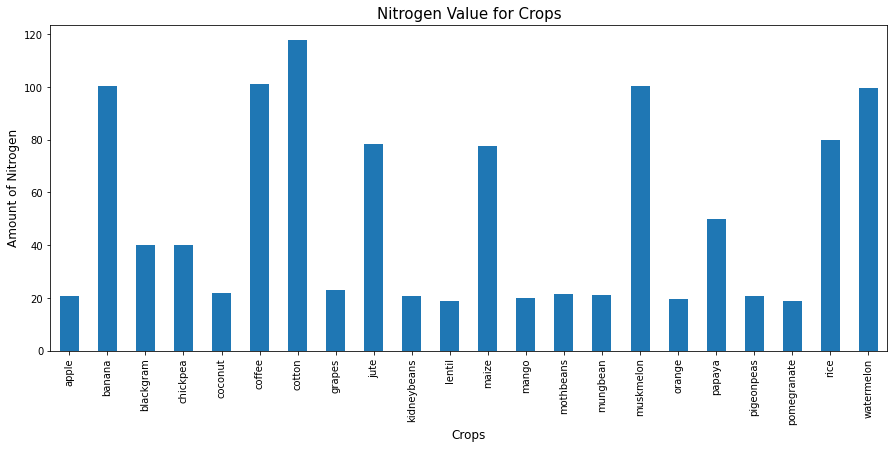

In [10]:
# With nitrogen discrete variable
plt.figure(figsize = (15,6))
df.groupby("Crops")["N"].mean().plot.bar()
plt.xlabel("Crops", fontsize =12)
plt.ylabel("Amount of Nitrogen", fontsize = 12)
plt.title("Nitrogen Value for Crops", fontsize = 15)
plt.show()

In [11]:
print("Crops uses less amount of Nitrogen in soil: ")
print(df[df["N"] < df["N"].mean()]["Crops"].unique())
print()
print("Crops use more amount of Nitrogen in soil:  ")
print(df[df["N"] > df["N"].mean()]["Crops"].unique())

Crops uses less amount of Nitrogen in soil: 
['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'papaya'
 'coconut']

Crops use more amount of Nitrogen in soil:  
['rice' 'maize' 'chickpea' 'blackgram' 'banana' 'watermelon' 'muskmelon'
 'papaya' 'cotton' 'jute' 'coffee']


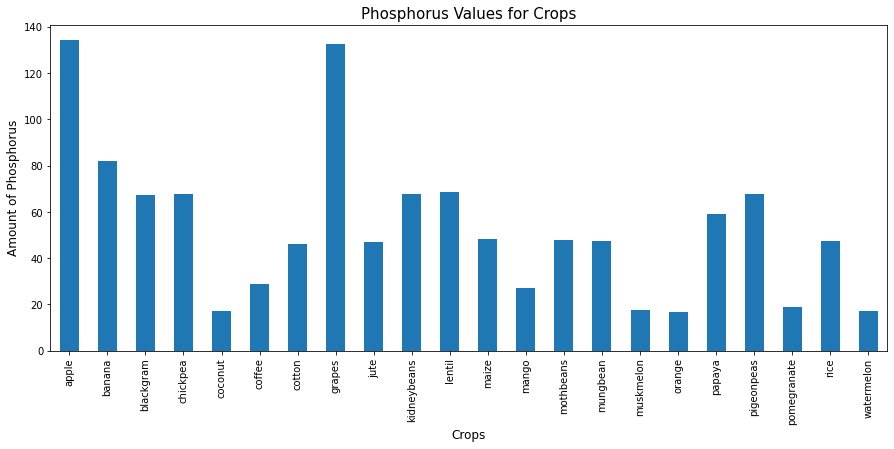

In [12]:
# With phosphorus discrete variable
plt.figure(figsize = (15,6))
df.groupby("Crops")["P"].mean().plot.bar()
plt.xlabel("Crops", fontsize =12)
plt.ylabel("Amount of Phosphorus", fontsize = 12)
plt.title("Phosphorus Values for Crops", fontsize = 15)
plt.show()

In [13]:
print("Crops which requied less or intermediate amount of phosphorus: ")
print(df[df["P"] < 90]["Crops"].unique())
print()
print("Crops which required more amount of phosphorus: ")
print(df[df["P"] > 90]["Crops"].unique())

Crops which requied less or intermediate amount of phosphorus: 
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']

Crops which required more amount of phosphorus: 
['banana' 'grapes' 'apple']


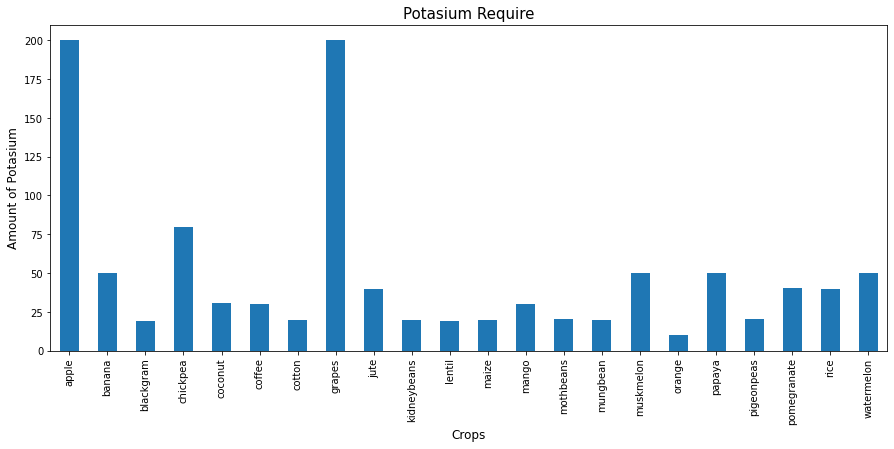

In [14]:
# with potasium discreate feature
plt.figure(figsize = (15,6))
df.groupby("Crops")["K"].mean().plot.bar()
plt.xlabel("Crops", fontsize =12)
plt.ylabel("Amount of Potasium", fontsize = 12)
plt.title("Potasium Require", fontsize = 15)
plt.show()

In [15]:
print("Crops which requied less or intermediate amount of potasium: ")
print(df[df["K"] < 90]["Crops"].unique())
print()
print("Crops which required more amount of potasium: ")
print(df[df["K"] > 90]["Crops"].unique())

Crops which requied less or intermediate amount of potasium: 
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']

Crops which required more amount of potasium: 
['grapes' 'apple']


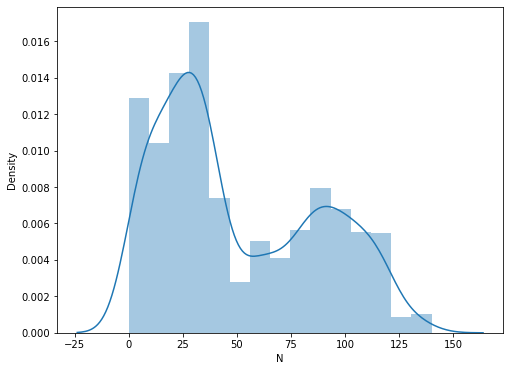

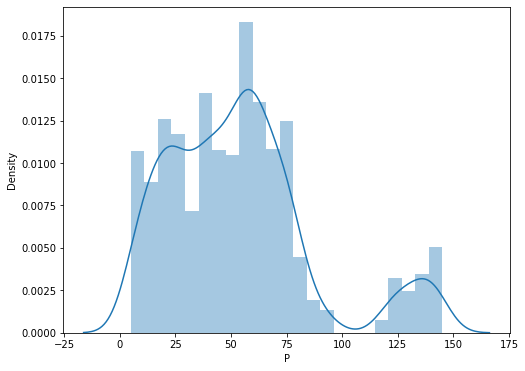

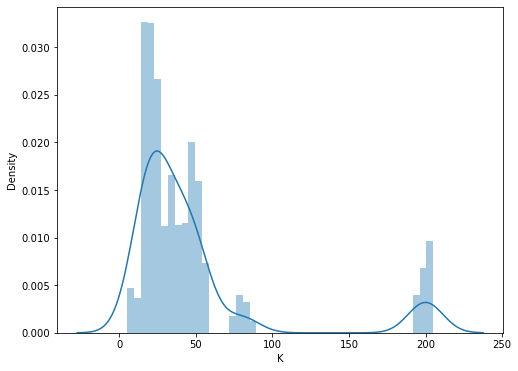

In [16]:
# analyzing distribution of discrete features
for feature in discrete_features[:-1]:
    plt.figure(figsize = (8,6))
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

### Continous features

In [17]:
# getting the features
continous_features = [feature for feature in df.columns if df[feature].nunique() > 200]
print("Continous value feature =", continous_features)

Continous value feature = ['Temperature', 'Humidity', 'Ph', 'Rainfall']


In [18]:
df[continous_features].head()

,Temperature,Humidity,Ph,Rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340


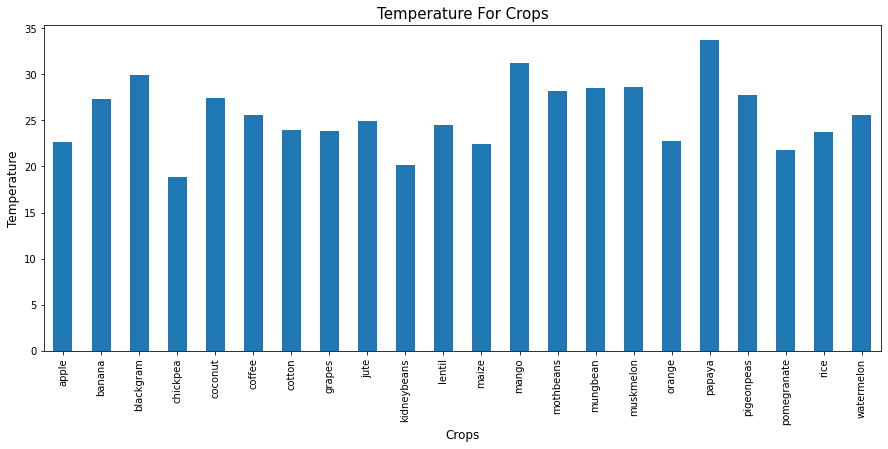

In [19]:
# temperature feature
plt.figure(figsize = (15,6))
df.groupby("Crops")["Temperature"].mean().plot.bar()
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.title("Temperature For Crops", fontsize = 15)
plt.show()

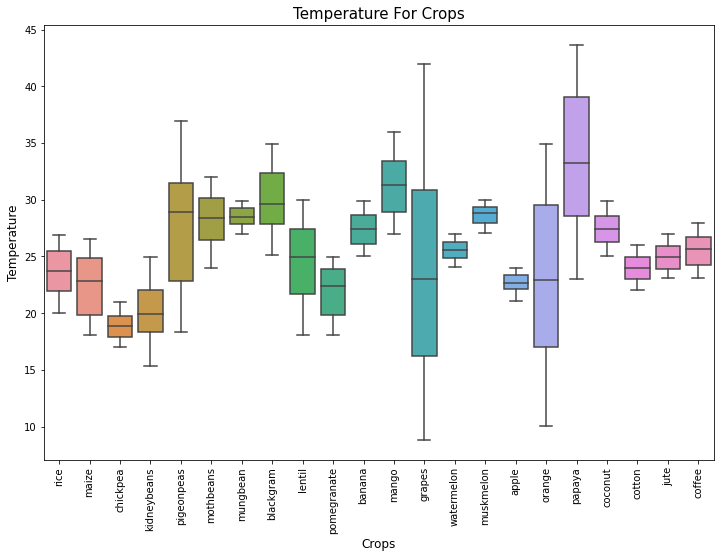

In [20]:
plt.figure(figsize= (12,8))
sns.boxplot(data = df, y = "Temperature",x = "Crops",)
plt.xticks(rotation = 90)
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.title("Temperature For Crops", fontsize = 15)
plt.show()

From the above graph
- Some crops can be grown in any temperature range like - grapes, orange, papaya, pigeonpeas .
- Most of the crops required specific temperature range like - mungbean, watermalelon, apple, chickpea, etc

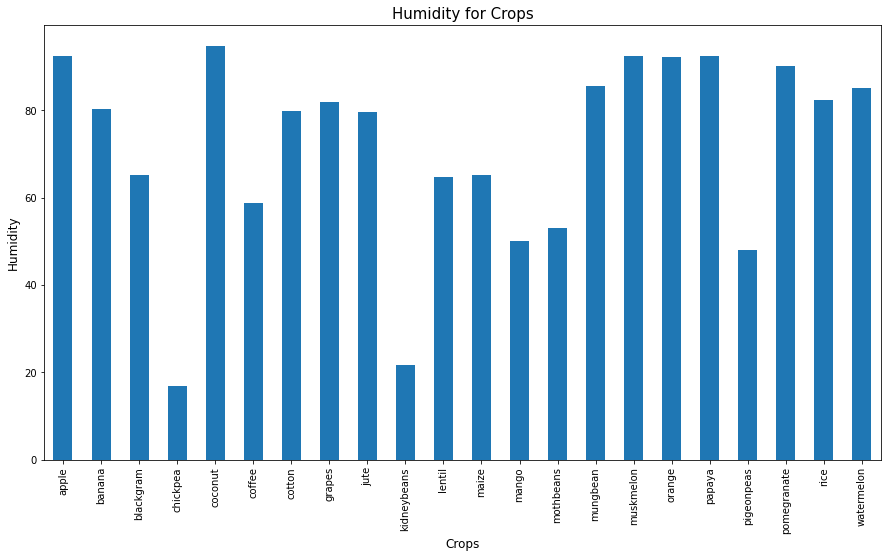

In [21]:
# Humidity for crops
plt.figure(figsize = (15,8))
df.groupby("Crops")["Humidity"].mean().plot.bar()
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Humidity" , fontsize = 12)
plt.title("Humidity for Crops", fontsize = 15)
plt.show()

In [22]:
print("Crops required low humidity ")
print(df[df["Humidity"] < df["Humidity"].mean()]["Crops"].unique())
print()
print("Crops required high humidity ")
print(df[df["Humidity"] > df["Humidity"].mean()]["Crops"].unique())

Crops required low humidity 
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'blackgram'
 'lentil' 'mango' 'jute' 'coffee']

Crops required high humidity 
['rice' 'maize' 'mungbean' 'pomegranate' 'banana' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute']


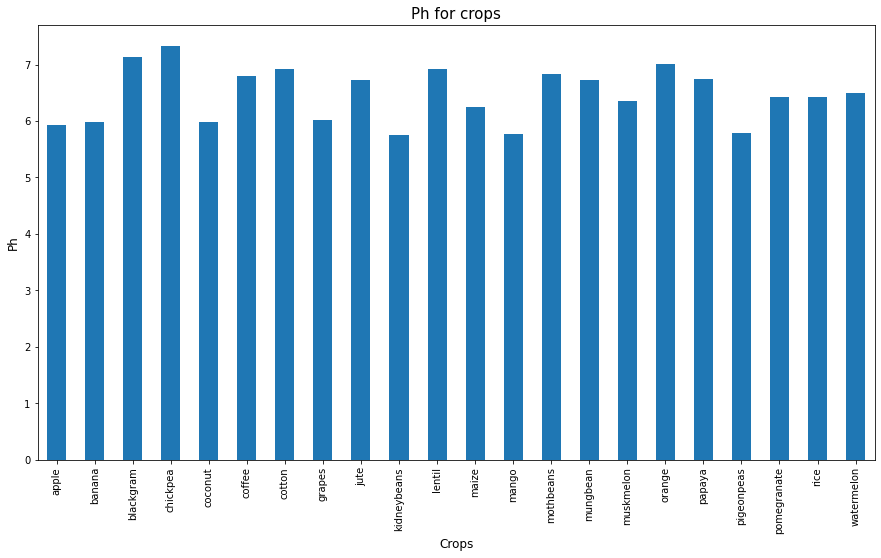

In [23]:
# ph value in soil
plt.figure(figsize = (15,8))
df.groupby("Crops")["Ph"].mean().plot.bar()
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Ph" , fontsize = 12)
plt.title("Ph for crops", fontsize = 15)
plt.show()

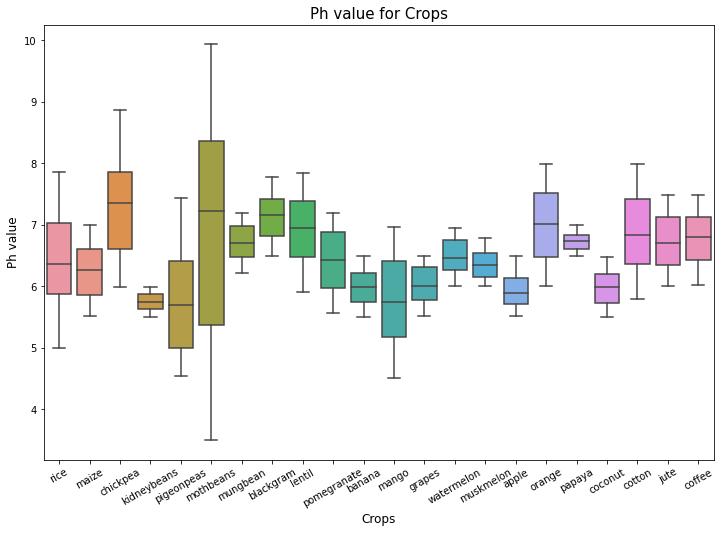

In [24]:
plt.figure(figsize= (12,8))
sns.boxplot(data = df, y = "Ph", x = "Crops")
plt.xticks(rotation = 30)
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Ph value", fontsize = 12)
plt.title("Ph value for Crops", fontsize= 15)
plt.show()

From the above graph
- Crops can be grown in wide ph value = mothbeans, mango , cotton , orange.
- Crops required specific ph range = kidneybeans , papaya, muskmelon, watermelon, mungbeans, etc.

In [25]:
print("Crops required low Ph ")
print(df[df["Ph"] < df["Ph"].mean()]["Crops"].unique())
print()
print("Crops required high Ph ")
print(df[df["Ph"] > df["Ph"].mean()]["Crops"].unique())

Crops required low Ph 
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'coconut' 'cotton' 'jute' 'coffee']

Crops required high Ph 
['rice' 'maize' 'chickpea' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon'
 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


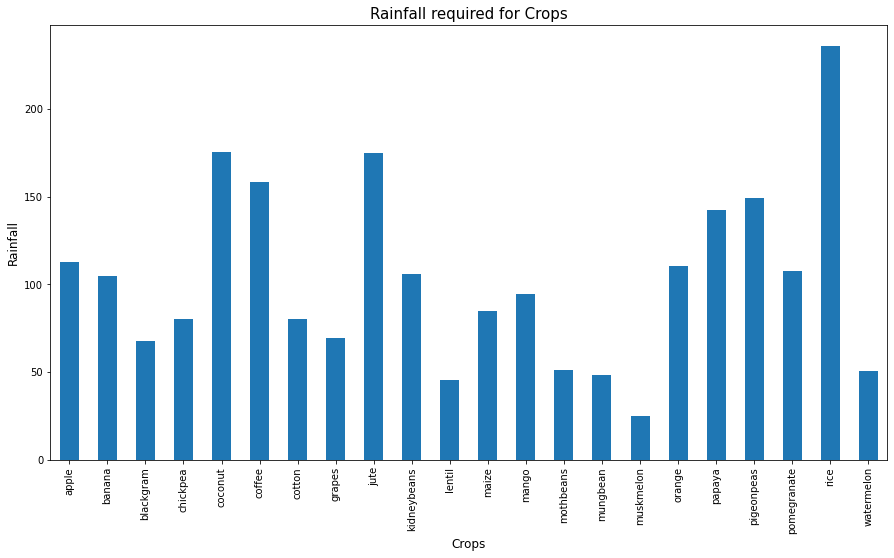

In [26]:
# for Rainfall value
plt.figure(figsize = (15,8))
df.groupby("Crops")["Rainfall"].mean().plot.bar()
plt.xlabel("Crops", fontsize = 12)
plt.ylabel("Rainfall" , fontsize = 12)
plt.title("Rainfall required for Crops", fontsize = 15)
plt.show()

In [27]:
print("Crops required low Rainfall ")
print(df[df["Rainfall"] < df["Rainfall"].mean()]["Crops"].unique())
print()
print("Crops required high Rainfall ")
print(df[df["Rainfall"] > df["Rainfall"].mean()]["Crops"].unique())

Crops required low Rainfall 
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'cotton']

Crops required high Rainfall 
['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'pomegranate' 'banana' 'apple'
 'orange' 'papaya' 'coconut' 'jute' 'coffee']


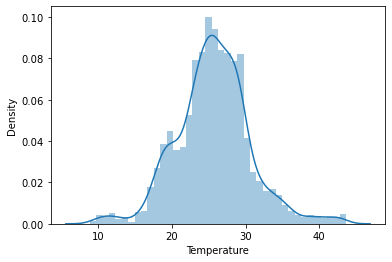

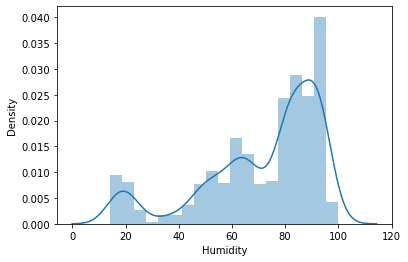

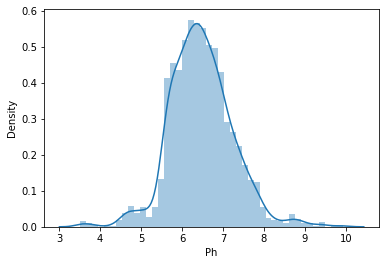

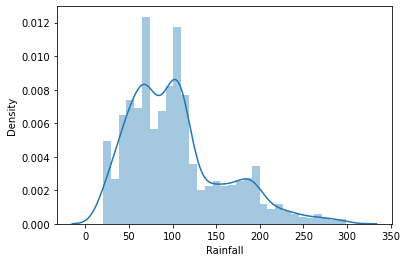

In [28]:
# distribution of continous features
for feature in continous_features:
    sns.distplot(df[feature])
    plt.show()

In [29]:
# summarizing feature for each crop
@interact.interact
def crops(Crops = df["Crops"].unique()):
    data = df[df["Crops"] == Crops]
    for feature in df.columns[:-1]:
        print("-----------------------")
        print(f"Statistics for {feature}")
        print(f"Minimum value of {feature} = {np.round(data[feature].min(), 2)}")
        print(f"Average value of {feature} = {np.round(data[feature].mean(), 2)}")
        print(f"Maximum value of {feature} = {np.round(data[feature].max(), 2)}")

interactive(children=(Dropdown(description='Crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [30]:
# summarizing every crop for each feature

@interact.interact
def feature_summary(Feature = df.columns[:-1]):
    print(f"Average value of feature for all crops = {np.round(df[Feature].mean(), 2)}")
    print("For Each Crops ")
    for crop in df["Crops"].unique():
        data = df[df["Crops"] == crop][Feature].mean()
        print(f"For {crop} : {np.round(data, 2)} required")

interactive(children=(Dropdown(description='Feature', options=('N', 'P', 'K', 'Temperature', 'Humidity', 'Ph',…

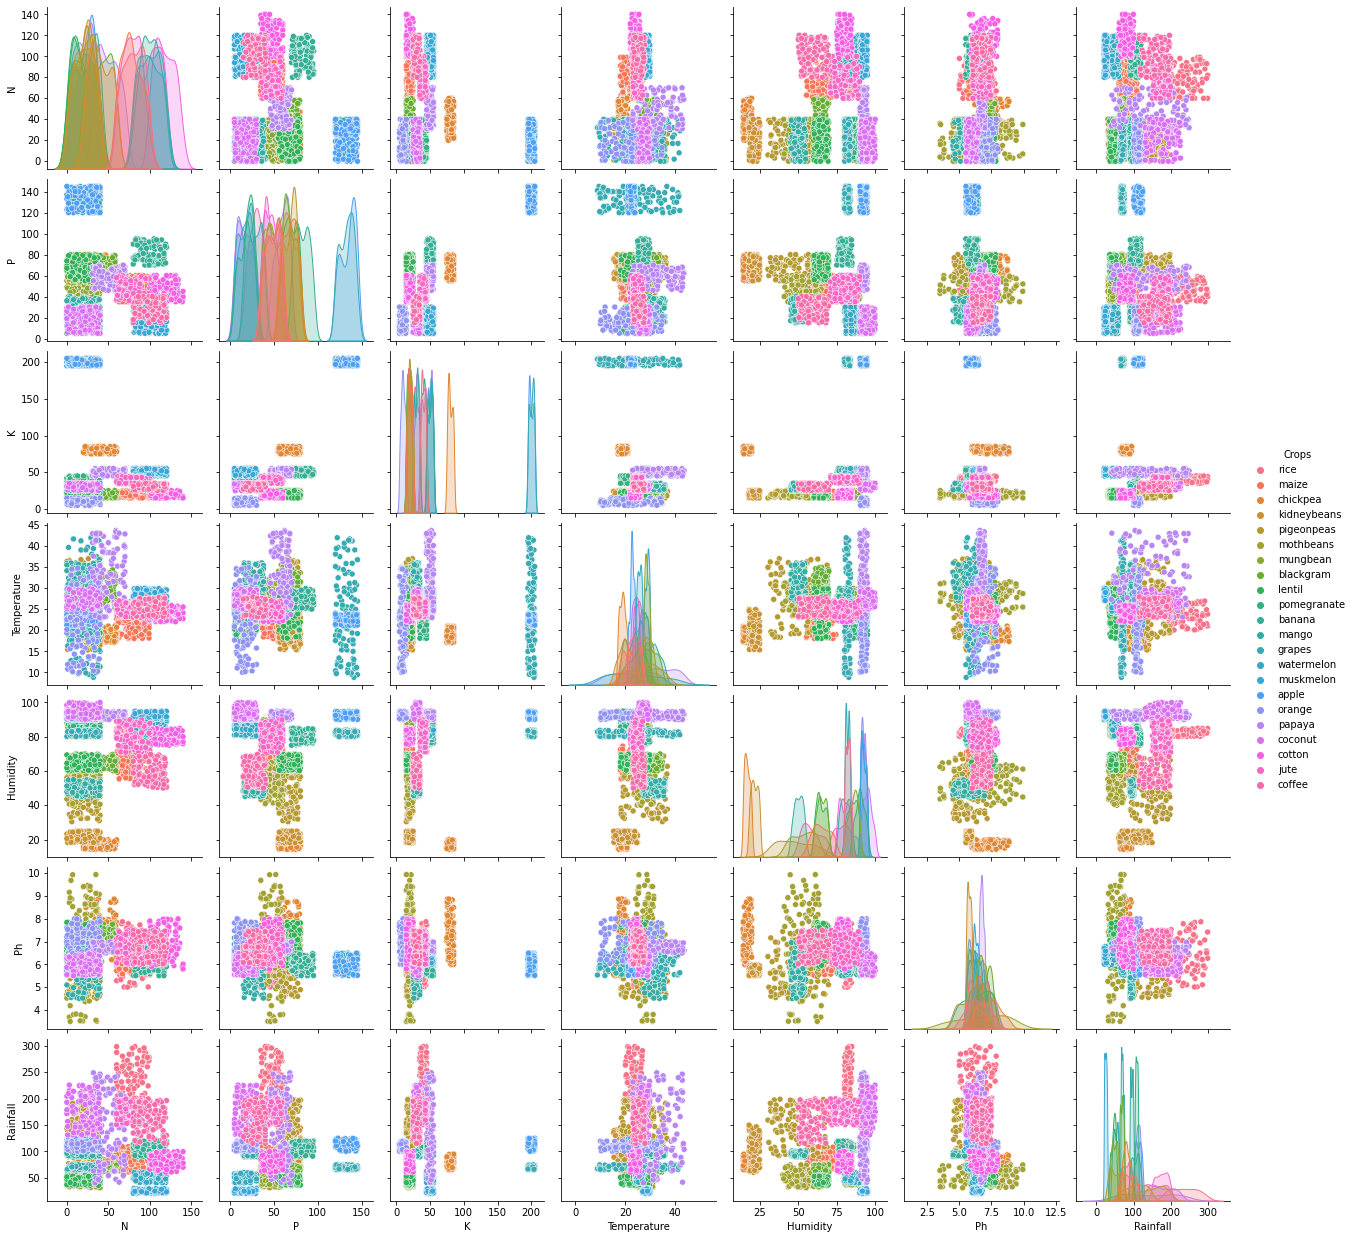

In [31]:
# analyzing every feature with each other
sns.pairplot(data = df, hue = "Crops")
plt.show()

## Feature Scaling

In [32]:
# importing library
from sklearn.preprocessing import StandardScaler

In [33]:
# geting feature to be scalled 
feature_scale = [feature for feature in df.columns if feature != "Crops"]

In [34]:
# fitting and transforming the model
scaler = StandardScaler()
trans_df = scaler.fit_transform(df[feature_scale])

In [35]:
trans_df
# gives array of values of scalled dataframe

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [36]:
# making scalled dataframe and concating the target variable

model_df = pd.concat([pd.DataFrame(trans_df, columns= feature_scale), df["Crops"]], axis= 1)
model_df.head()

,N,P,K,Temperature,Humidity,Ph,Rainfall,Crops
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice


### Spliting the model
Spliting the dataset into train and test datasets

In [37]:
# importing library for spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(model_df.drop("Crops", axis = 1), model_df["Crops"], 
                                                    test_size= 0.2, random_state= 0)

In [38]:
# training data shapes
x_train.shape, y_train.shape

((1760, 7), (1760,))

In [39]:
# testing data shapes
x_test.shape, y_test.shape

((440, 7), (440,))

## Model Building

In [40]:
# importing logistic Regression model
from sklearn.linear_model import LogisticRegression

In [41]:
# fitting the model
log_regr = LogisticRegression()
log_regr.fit(x_train,y_train)

LogisticRegression()

In [42]:
# predicting crops value
y_predict = log_regr.predict(x_test)

In [43]:
# getting scores 
log_regr.score(x_test, y_test)

0.9636363636363636

## Model Evaluation

In [44]:
# importing library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
# confusion matix
print(confusion_matrix(y_test, y_predict))

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 21  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [46]:
# classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

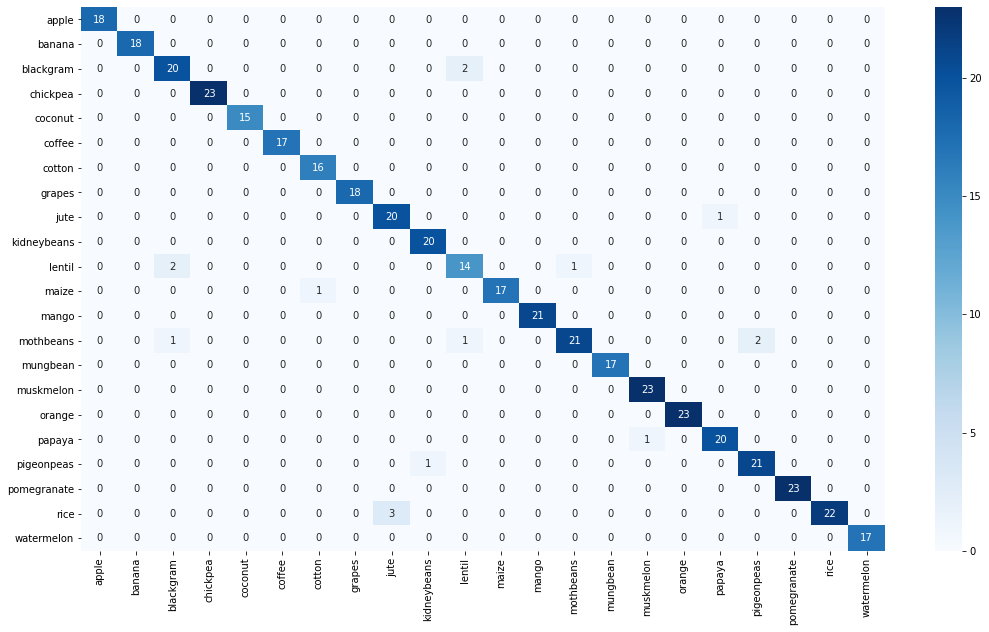

In [47]:
cm = confusion_matrix(y_test, y_predict)
labels = sorted(model_df["Crops"].unique())

# ploting confusion matrix
plt.figure(figsize = (18,10))
sns.heatmap(cm, annot= True, xticklabels= labels , yticklabels= labels, cmap = "Blues")
plt.show()

### Models accuracy is more than 95%.

## Saving the model 

In [48]:
# importing libraray pickle
import pickle

### Saving prediction model

In [49]:
# open a file where model has to save
regr_file = open("model.pkl", "wb")

# dumping model
pickle.dump(log_regr, regr_file)

# closing file
regr_file.close()

## Saving crop suggestion model

In [50]:
# class for crop suggestion
class suggestion:
    df = pd.read_csv("data/agricultural_data.csv")
    def __init__(self, nitrogen, phosphorous, potassium, temperature, humidity, ph, rainfall):
        self.nitrogen = nitrogen
        self.phosphorous = phosphorous
        self.potassium = potassium
        self.temperature = temperature
        self.humidity = humidity
        self.ph = ph
        self.rainfall = rainfall

    def crops(self):
        crops = self.df[ ( ( self.nitrogen - 20 < self.df["N"]) & (self.df["N"] < self.nitrogen+20) ) &
        ( (self.phosphorous - 20 < self.df["P"]) & (self.df["P"] < self.phosphorous+20) )  &
        ( (self.potassium - 20 < self.df["K"]) & (self.df["K"] < self.potassium+20)  ) &
        ( (self.temperature - 10 < self.df["Temperature"]) & (self.df["Temperature"] < self.temperature+10) ) &
        ( (self.humidity - 20 < self.df["Humidity"]) & (self.df["Humidity"] < self.humidity+20)  )  &
        ( (self.ph - 2 < self.df["Ph"]) & (self.df["Ph"] < self.ph+ 2) ) &
        ( (self.rainfall - 25 < self.df["Rainfall"]) & (self.df["Rainfall"] < self.rainfall+25) ) ]["Crops"].unique()

        return crops


In [51]:
# dummping the suggestion model into pickle file
suggest_file= open("suggest.pkl", "wb")

# dumping model
pickle.dump(suggestion, suggest_file)

# closing file
suggest_file.close()

## More observation and Conclusions

In [52]:
df.head()

,N,P,K,Temperature,Humidity,Ph,Rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [53]:
# Crops has to be grown in different seasons
print("Summer Crops:")
print(df[(df["Temperature"] > 30) & (df["Humidity"] > 50)]["Crops"].unique() )
print("-----------------------------------------------------------------------")
print("Winter Crops: ")
print(df[(df["Temperature"] < 20) & (df["Humidity"] > 30)]["Crops"].unique() ) 
print("-----------------------------------------------------------------------")
print("Rainy Season Crops: ")
print(df[(df["Rainfall"] > 200) & (df["Humidity"] > 30)]["Crops"].unique() )

Summer Crops:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------------------------------
Winter Crops: 
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------------------------
Rainy Season Crops: 
['rice' 'papaya' 'coconut']


<h1 align = "center" > Thank You </h1>